<a href="https://colab.research.google.com/github/AleksandrRevuka/HW_Data_Science/blob/main/Hw3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# напишіть функцію гіпотези лінійної регресії у векторному вигляді

1.   List item
2.   List item



In [88]:
import numpy as np
import pandas as pd

def hypothesis(X, w):
    return np.dot(X, w)

# створіть функцію для обчислення функції втрат у векторному вигляді

In [89]:
def cost_function(X, y, w):
    m = y.shape[0]
    predictions = hypothesis(X, w)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors**2)
    return J


# реалізуйте один крок градієнтного спуску

In [90]:
def gradient_descent_step(X, y, w, learning_rate):
    m = len(y)
    h = hypothesis(X, w)
    gradient = (1 / m) * np.dot(X.T, (h - y))
    w = w - learning_rate * gradient
    return w

# знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [91]:
data = pd.read_csv("Housing.csv")

data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [137]:
def gradient_descent(X, y, w, learning_rate, num_iterations):
    cost_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        w = gradient_descent_step(X, y, w, learning_rate)
        loss = cost_function(X, y, w)
        cost_history[i] = loss
    return w, cost_history

In [138]:
def normalize_data(data):
    mu = np.mean(data)
    sigma = np.std(data)
    normalized_feature = (data - mu) / sigma
    return normalized_feature

In [139]:
def add_intercept(X):
    return np.c_[np.ones(X.shape[0]), X]

data = pd.read_csv("Housing.csv")

selected_features = ['area', 'bathrooms', 'bedrooms']
target = 'price'

X = data[selected_features].values
y = data[target].values

for i in range(X.shape[1]):
    X[:, i] = normalize_data(X[:, i])

X = add_intercept(X)

w_initial = np.zeros(X.shape[1])

learning_rate = 0.001
iterations = 5000

best_w_gradient_descent, cost_history = gradient_descent(X, y, w_initial, learning_rate, iterations)

print("Оптимальні параметри (w):", best_w_gradient_descent)

Оптимальні параметри (w): [4224595.59458372  827159.39976184 1392935.27309076  404070.87769273]


# знайдіть ці ж параметри за допомогою аналітичного рішення

In [140]:
def normal_equation(X, y):
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

best_w_analytical_solution = normal_equation(X, y)

print("Оптимальні параметри за допомогою аналітичного рішення:", best_w_analytical_solution)


Оптимальні параметри за допомогою аналітичного рішення: [4316380.34126579  839082.7656552  1210983.66933953  491180.49283573]


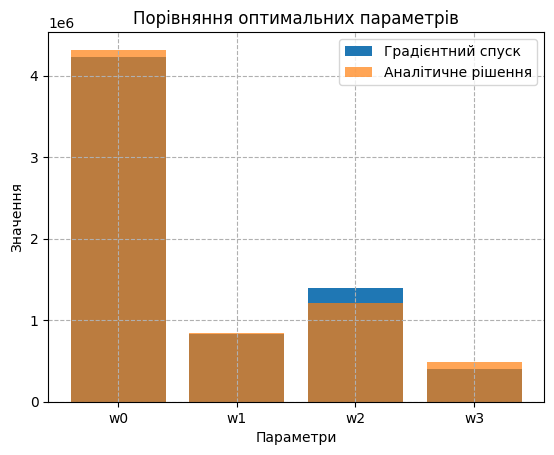

In [141]:
import matplotlib.pyplot as plt

plt.bar(['w0', 'w1', 'w2', 'w3'], best_w_gradient_descent, label='Градієнтний спуск')
plt.bar(['w0', 'w1', 'w2', 'w3'], best_w_analytical_solution, alpha=0.7, label='Аналітичне рішення')

plt.xlabel('Параметри')
plt.ylabel('Значення')
plt.title('Порівняння оптимальних параметрів')
plt.grid(linestyle='--')
plt.legend()
plt.show()

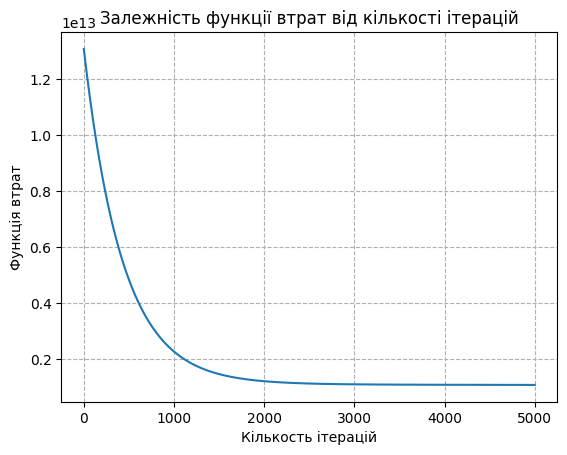

In [142]:
plt.plot(range(1, len(cost_history) + 1), cost_history)
plt.title('Залежність функції втрат від кількості ітерацій')
plt.xlabel('Кількость ітерацій')
plt.ylabel('Функція втрат')
plt.grid(linestyle='--')
plt.show()